#### Jérémy TREMBLAY

# TP7: Neural Network - Part 1

In [1]:
# Import the libraries that will be used in this notebook.
import numpy as np
import pandas as pd
import os
import keras

# Import the pyplot module from matplotlib with the plt alias.
import matplotlib.pyplot as plt

# Other.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, load_model
from keras.layers import Input, Dense

## Task 1: Load and separate data

**Consigne :** Charger les données à l’aide de la librairie pandas. Puis proposez une séparation aléatoire de données à hauteur de 80% pour l’ensemble d’apprentissage et 20% pour l’ensemble de test.  
Indications :
* Le champs à prédire sera `quality`.
* Vous pouvez utiliser la librairie `scikit-learn` pour effectuer cette séparation.  
Une fois les données séparées, nous allons les standardiser pour faciliter l’apprentissage de notre futur modèle. Cette standardisation sera fera de la manière suivante :  
`z = (xi - µ) / σ`  
avec :
* xi un vecteur d’entrée du modèle
* µ les moyennes de chaque caractéristique
* σ les écart-types de chaque caractéristique

In [2]:
# Specify the relative path of the wine file.
file_path = 'datasets/winequality-red.csv'

# Load the database into a DataFrame.
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame with head.
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
print(df.isnull().any())

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


The dataset is already clean, we can easily read it now and search some information.

In [4]:
# Know the dimensions of the dataframe.
df.shape

(1599, 12)

There is 1599 rows and 12 columns, let's check the content more in detail with some stats.

In [5]:
# Display usefull information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

We can see different columns that are used to predict the quality of the wine. We will try to create a model to make predictions on that quality. Let's split data.

In [8]:
# Drop the quality variable.
X = df.drop('quality', axis=1)
y = df['quality']

# Split data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Let's scale our data with a scaler.

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Task 2: Standardize data

**Consigne :** À l’aide de la librairie `numpy`, effectuer la standardisation de ces données d’entrée.  
Indications :
* La moyenne et l’écart-type seront calculés uniquement sur les données d’apprentissage.
* Ils seront utilisés à la fois pour la standardisation des bases de test et d’apprentissage (dans la réalité, nous ne connaissons que les données d’apprentissage).

We have already scale our data at the last question, but can also standardize data manually, let's try it but it is not mandator here since we have use our scaler.

In [10]:
# Compute mean and std values.
mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)

print("Mean (train):", mean_train)
print("std (train):", std_train)

# Standardization.
X_train_scaled_np = (X_train - mean_train) / std_train
X_test_scaled_np = (X_test - mean_train) / std_train

print("\nShapes after scale (train):", X_train_scaled_np.shape)
print("Shape after scale (test):", X_test_scaled_np.shape) 

Mean (train): fixed acidity            8.309562
volatile acidity         0.533132
citric acid              0.270250
residual sugar           2.548302
chlorides                0.087711
free sulfur dioxide     15.920465
total sulfur dioxide    46.966488
density                  0.996778
pH                       3.314272
sulphates                0.658820
alcohol                 10.417337
dtype: float64
std (train): fixed acidity            1.713133
volatile acidity         0.181940
citric acid              0.195404
residual sugar           1.427092
chlorides                0.047122
free sulfur dioxide     10.268575
total sulfur dioxide    33.021928
density                  0.001839
pH                       0.153911
sulphates                0.172165
alcohol                  1.059278
dtype: float64

Shapes after scale (train): (1119, 11)
Shape after scale (test): (480, 11)


We will use our scaled data with the StandardScaler for the rest of this notebook.

## Task 3: Create a `get_model` function

**Consigne :** Créer maintenant une fonction get_model qui prend en paramètre la géométrie des données d’entrée et retourne un modèle.
* Ce modèle sera de type `Sequential` (voir `keras.models`).
* Il sera composé d’un layer `Input` qui prendra en paramètre la géométrie des données d’entrée.
* De deux layers cachés `Dense`, tous deux composés de fonctions d’activation de type `ReLu` et respectivement 128 et 32 neurones.
* Enfin, un dernier layer de type `Dense` avec un neurone. Il s’agira du layer de sortie.  

Indications :
* Dans le cadre de la régression, il ne faut pas proposer de fonction d’activation dans la couche de sortie.
* La liste des layers disponibles est présente dans le module `keras.layers`.  

Vous pouvez maintenant proposer un affichage sommaire de votre modèle à l’aide de la fonction `summary`. 

In [11]:
def get_model(input_shape):
    """
    Creates a Sequential model for regression.

    Parameters:
    - input_shape (tuple): The shape of the input data.

    Returns:
    - model (Sequential): A Sequential model with an input layer, two hidden Dense layers with ReLU activation,
                         and an output layer for regression.
    """
    model = Sequential()

    # Add input layer.
    model.add(Input(shape=input_shape))

    # Add internal layers.
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))

    # Add output layer.
    model.add(Dense(1))

    return model

# reate the model based on the number of parameters in the train data.
model = get_model(X_train_scaled_np.shape[1])

# Display the summary.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5697 (22.25 KB)
Trainable params: 5697 (22.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now we have fixe the number of parameters and create our model, we can compile it.

In [12]:
model.compile(optimizer='rmsprop', loss='mse', metrics= ['mae', 'mse'])

Let's add a callback to save the best model (will be used later).

In [13]:
model_folder = 'models/wine/best_model.h5'
os.makedirs('models/wine', exist_ok=True)
save_callback = keras.callbacks.ModelCheckpoint(filepath=model_folder, verbose=0, save_best_only=True)

## Task 4: Fit model

**Consigne :** : Proposez un apprentissage de votre modèle à l’aide de sa fonction `fit`. Il vous faudra pour la suite stocker le retour de cette fonction dans une variable, par exemple `history`. Vous allez pouvoir lui fournir les informations suivantes :
* Les données d’entrée de la base d’apprentissage et les prédictions attendues.
* Un nombre d’époque à 50.
* Un batch de taille 8.
* Des données de validation (`validation_data`) qui seront les données de test.
* Le callback de sauvegarde dans le paramètre `callbacks` qui attend une liste de fonctions.

We fit our model by giving it the train data, and we fix the corresponding parameters and the callback. We also give it the validation data (test data).

In [14]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_data=(X_test_scaled, y_test), callbacks=[save_callback])

Epoch 1/50



We can see that the loss progressively decrease as well as the MAE and MSE (this is a good sign, the model fit well) for each epoch. This is interesting. We can trace the work of our model with this. The file has been saved by our callback in the `models/wine` folder.

## Task 5: Display data

**Consigne :** À partir de la variable `history` obtenue en retour de l’apprentissage de votre modèle, affichez les courbes d’apprentissage et de validation de votre modèle au cours des époques.

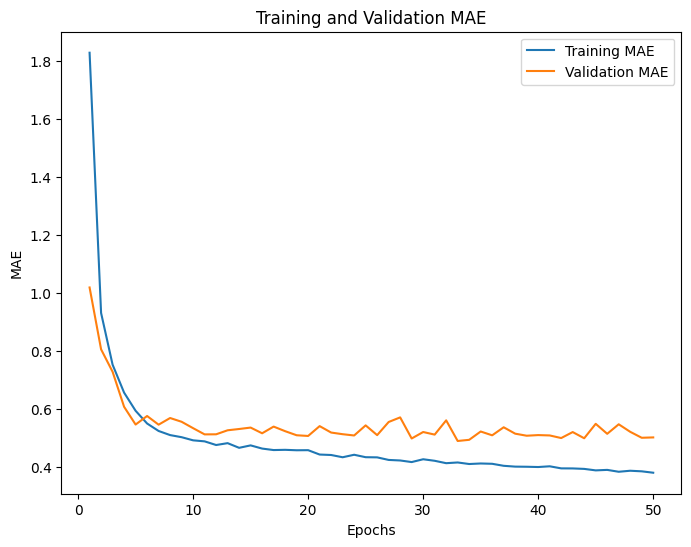

In [ ]:
def plot_mae_curve(history):
    """
    Plots the Mean Absolute Error (MAE) curves for training and validation from the provided training history.

    Parameters:
    - history (History): The training history returned by the Keras model training process.

    Returns:
        None
    """
    # Get the MAE values from the history, fix limits and plot the curves.
    mae = history.history['mae']
    val_mae = history.history['val_mae']
    epochs = range(1, len(mae) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, mae, label='Train')
    plt.plot(epochs, val_mae, label='Validation')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

plot_mae_curve(history)

The validation MAE seems constant around ~0.5 while the train MAE keep decreasing (this is logical).

## Task 6: Evaluate the model

**Consigne:** Réaliser une évaluation à partir du meilleur modèle obtenu. Il sera évalué sur les données de test à partir de sa méthode `evaluate`. Cette méthode retourne plusieurs valeurs : la loss et les métriques obtenues qui avaient été précisées.  
Indications :
* Il est possible de charger un modèle et ses poids entraînés à partir d’un fichier d’extension *h5*.
* La méthode `load_model` du module `keras.models` charge un modèle sous ce format.
* Pour rappel, le meilleur modèle était sauvegardé à l’aide de notre callback dans le fichier `models/wine/best_model.h5`.

First, we load our model save previously.

In [ ]:
# Load our best h5 model.
best_model = load_model('models/wine/best_model.h5')

Then we can evaluate it on the train data.

In [ ]:
# Evaluate our model on the test data.
evaluation_results = best_model.evaluate(X_test_scaled, y_test)

15/15 [==============================] - 0s 3ms/step - loss: 0.3876 - mae: 0.5059 - mse: 0.3876


Let's display the results.

In [ ]:
# Display results properly.
print(f"Loss: {evaluation_results[0]}")
print(f"MAE: {evaluation_results[1]}")
print(f"MSE: {evaluation_results[2]}")

Loss: 0.38757383823394775
MAE: 0.5058877468109131
MSE: 0.38757383823394775


**Questions :**
* Comment est-il possible d’interpréter les courbes d’apprentissage obtenues ?
* Qu’en est t’il de la performance moyenne de notre modèle pour la prédiction de la qualité du vin ?

The learning curves indicate that the model exhibits good learning capability on the training set, with a gradual convergence. However, after epoch 20, a slight divergence between the training and validation MAE curves suggests the onset of overfitting. The overall performance of the model, assessed by the loss on the test set at the last epoch (0.4056), is relatively good, but it can probably be improved.